In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

/home/nerd911/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


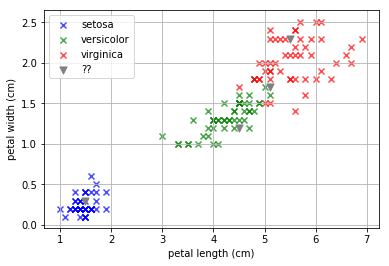

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

print('Features: ', iris.feature_names)
print('Targets: ', iris.target_names)

petal_length = iris.data[:, iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

for target in set(iris.target):
    example_ids = target == iris.target
    plt.scatter(petal_length[example_ids], petal_width[example_ids],
                label=iris.target_names[target], color='bgr'[target],
                marker='x', alpha=0.7)
unknown = np.array([
    [1.5, 0.3],
    [4.5, 1.2],
    [5.5, 2.3],
    [5.1, 1.7]
])
plt.scatter(unknown[:, 0], unknown[:, 1], marker='v',
            color='gray', s=50, label='??')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.grid(True)
plt.legend(loc='upper left')

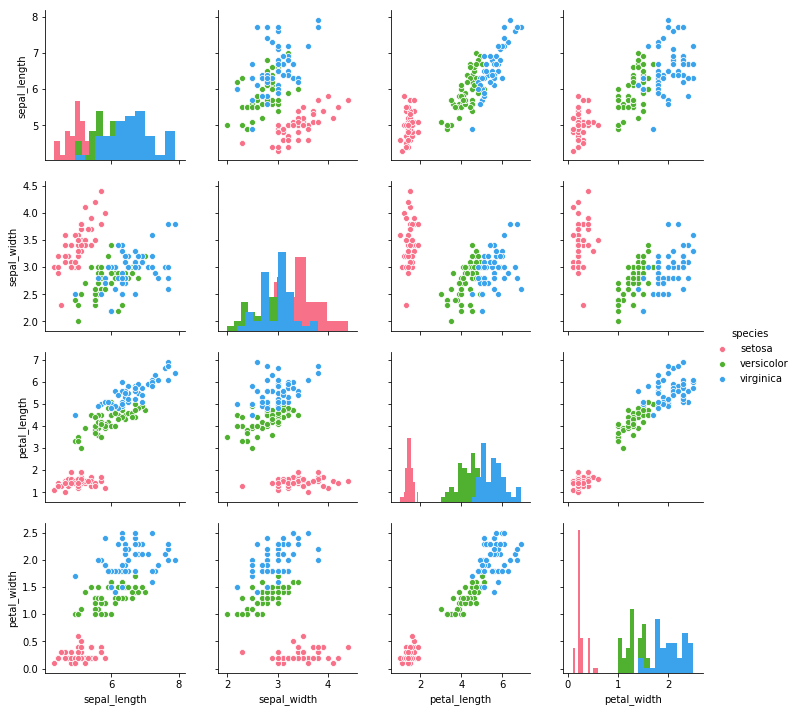

In [3]:
sns.pairplot(sns.load_dataset("iris"), hue="species", palette="husl", diag_kind="hist")

In [4]:
from scipy.stats import mode
def euclidean_square_metric(a, b):
  return np.square(a[:,np.newaxis]-b).sum(axis=2)

def knn(train_X, train_y, test_X, k, metric=euclidean_square_metric):
  dists = metric(test_X, train_X)
  closest = np.argsort(dists, 1)[:,:(k)]
  targets = train_y[closest]
  return mode(targets, axis = 1).mode[:,0]

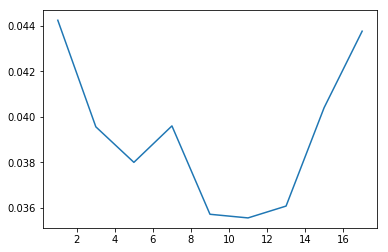

In [5]:
def score(labels, predictions):
  return np.sum(labels == predictions)/labels.shape[0]

def validate(X, y, k):
  n = X.shape[0]
  m = n//3
#   print(m)
  train_indices = np.arange(n)
  np.random.shuffle(train_indices)
  test_indices = train_indices[:m]
  train_indices = train_indices[m:]
  predictions = knn(X[train_indices], y[train_indices], X[test_indices], k)
#   print(predictions)
  return 1. - score(y[test_indices], predictions)

def test_avg_error(X, y, k):
  result = 0.
  reps = 500
  for _ in range(reps):
    result += validate(X, y, k)
  return result / reps

k_range = 19
k_vec = np.arange(1, k_range, 2)
errors = np.array([test_avg_error(iris.data, iris.target, k) for k in k_vec])
plt.plot(k_vec, errors)

Coefficients: 
 [0.4236207]
Mean squared error: 0.01
Variance score: -0.11


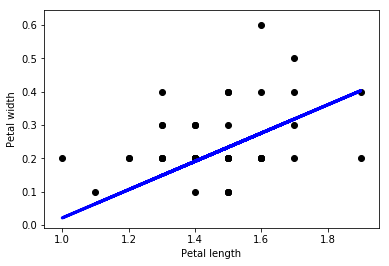

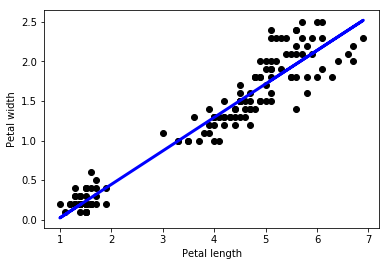

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

test_n = petal_length.shape[0]//3
petal_length = petal_length.reshape(-1,1)
X_train = petal_length[test_n:,:]
X_test = petal_length[:test_n,:]
y_train = petal_width[test_n:]
y_test = petal_width[:test_n]

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

plt.scatter(X_test, y_test,  color='black')
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.plot(X_test, y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

plt.scatter(petal_length, petal_width,  color='black')
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.plot(petal_length, regr.predict(petal_length), color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()